In [1]:
import numpy as np
import pandas as pd

In [2]:
df = pd.read_csv('spam.csv',encoding='latin1')
df.head(5)

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [3]:
df.shape


(5572, 5)

In [4]:
df.isnull().sum()

v1               0
v2               0
Unnamed: 2    5522
Unnamed: 3    5560
Unnamed: 4    5566
dtype: int64

# Data Cleaning

In [5]:
df.drop(columns=['Unnamed: 2','Unnamed: 3','Unnamed: 4'],inplace=True)

In [6]:
df.head(4)

,v1,v2
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...


In [7]:
df.rename(columns={'v1':'label','v2':'text'},inplace=True)

In [8]:
df.head(3)

,label,text
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...


In [9]:
from sklearn.preprocessing import LabelEncoder
encoder=LabelEncoder()

In [10]:
df['label'] = encoder.fit_transform(df['label'])

In [11]:
df.head()

,label,text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [12]:
df.duplicated().sum()

403

In [13]:
df = df.drop_duplicates(keep='first')

In [14]:
df.duplicated().sum()

0

# EDA

In [15]:
df['label'].value_counts()

label
0    4516
1     653
Name: count, dtype: int64

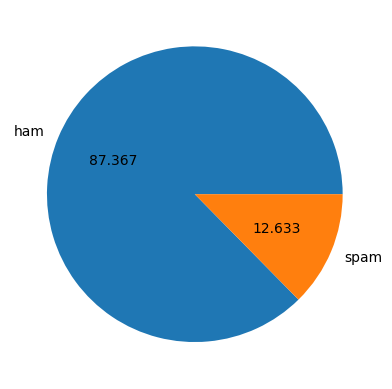

In [16]:
import matplotlib.pyplot as plt
plt.pie(df['label'].value_counts(), labels=['ham','spam'], autopct="%0.3f")
plt.show()

In [17]:
import nltk

In [18]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to C:\Users\Thakuri Ingh
[nltk_data]     chakra\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [19]:
df.loc[:, 'num_char'] = df['text'].apply(len)

In [20]:
df.head(5)

,label,text,num_char
0,0,"Go until jurong point, crazy.. Available only ...",111
1,0,Ok lar... Joking wif u oni...,29
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,0,U dun say so early hor... U c already then say...,49
4,0,"Nah I don't think he goes to usf, he lives aro...",61


# Data Preprocessing

In [21]:
from nltk.corpus import stopwords
import string
from nltk.stem.porter import PorterStemmer
st= PorterStemmer()

In [22]:
def transform_text(text):
    text=text.lower()
    text=nltk.word_tokenize(text)
    y=[]
    for i in text:
        if i.isalnum():
            y.append(i)
    text = y[:]
    y.clear()
    for i in text:
        if i not in stopwords.words('english') and i not in string.punctuation:
            y.append(i)

    text = y[:]
    y.clear()
    for i in text:
        y.append(st.stem(i))
        
    return " ".join(y)
    

In [23]:
msg = transform_text(df['text'][10])
print(msg)

gon na home soon want talk stuff anymor tonight k cri enough today


In [24]:
df['transformed'] = df['text'].apply(transform_text)
df.head(5)

,label,text,num_char,transformed
0,0,"Go until jurong point, crazy.. Available only ...",111,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,nah think goe usf live around though


In [29]:
from wordcloud import WordCloud
wc=WordCloud(width=500,height=550,min_font_size=10,background_color='white')

In [32]:
text_cloud = wc.generate(df[df['label']==0]['transformed'].str.cat(sep=" "))

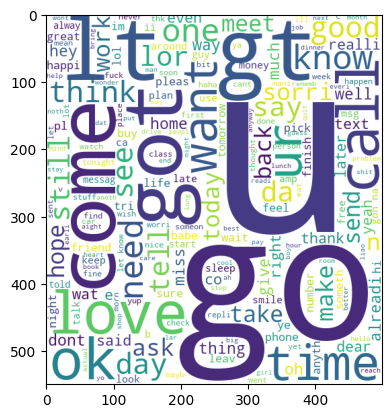

In [33]:
plt.imshow(text_cloud)

# model 

In [36]:
from sklearn.feature_extraction.text import CountVectorizer
cv=CountVectorizer()

In [37]:
X=cv.fit_transform(df['transformed']).toarray()

In [38]:
X.shape

(5169, 6708)

In [40]:
y=df['label'].values
y

array([0, 0, 1, ..., 0, 0, 0])

In [41]:
from sklearn.model_selection import train_test_split

In [45]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=2)

In [46]:
X_train.shape

(4135, 6708)

In [54]:
from sklearn.naive_bayes import BernoulliNB
from sklearn.metrics import accuracy_score,confusion_matrix,precision_score

In [55]:
bnb=BernoulliNB()

In [57]:
bnb.fit(X_train,y_train)
y_predict=bnb.predict(X_test)
print(accuracy_score(y_test,y_predict))
print(precision_score(y_test,y_predict))
print(confusion_matrix(y_test,y_predict))

0.9700193423597679
0.9734513274336283
[[893   3]
 [ 28 110]]


In [61]:
import pickle
pickle.dump(cv,open('vector.pkl','wb'))
pickle.dump(bnb,open('model.pkl','wb'))